In [50]:
%load_ext autoreload
%autoreload 2

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utils import plot_scatter

import json
import re

In [2]:
new_data = pd.read_csv("data/dataset.csv")

# For the model selection only the first initial data is availbable
# new_data = new_data.iloc[:100, :]
samples = [
    re.sub(r"[()' ]", "", x).split(",") for
    x in new_data["AB"].values
]
samples = np.asarray(samples)

In [3]:
df = pd.read_csv('./data/feature_dataset.csv')

In [4]:
df

,C,N,O,H,S,F,Cl,NumAtoms,AtomIsInRing,AtomIsAromatic,...,energy,a,b,c,PCE,Jsc,Voc,FF,MolFormular,SMILES
0,53.0,2.0,4.0,44.0,0.0,0.0,0.0,103.0,49.0,48.0,...,-66756.053428,0.005266,0.000512,0.000470,14.653520,19.925500,0.969192,0.758792,C53H44N2O4,[H]c1c([H])c(N(c2c([H])c([H])c(OC([H])([H])[H]...
1,46.0,3.0,4.0,41.0,0.0,0.0,0.0,94.0,42.0,42.0,...,-60945.716400,0.005484,0.000765,0.000710,13.625333,19.384833,0.936152,0.750825,C46H41N3O4,[H]c1c(-c2c([H])c([H])c(N(c3c([H])c([H])c(OC([...
2,53.0,2.0,5.0,42.0,0.0,0.0,0.0,102.0,49.0,48.0,...,-68767.958328,0.005045,0.000522,0.000477,15.390800,21.271833,0.969527,0.746271,C53H42N2O5,[H]c1c([H])c(N(c2c([H])c([H])c(OC([H])([H])[H]...
3,45.0,3.0,4.0,39.0,0.0,0.0,0.0,91.0,42.0,42.0,...,-59877.467861,0.005563,0.000785,0.000699,12.894920,19.132333,0.907476,0.742704,C45H39N3O4,[H]c1nc(-c2c([H])c([H])c(N(c3c([H])c([H])c(OC(...
4,47.0,2.0,4.0,42.0,0.0,0.0,0.0,95.0,42.0,42.0,...,-60509.519684,0.005454,0.000775,0.000691,15.395600,21.044333,0.953546,0.767220,C47H42N2O4,[H]c1c([H])c(N(c2c([H])c([H])c(OC([H])([H])[H]...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,43.0,4.0,0.0,32.0,0.0,0.0,0.0,79.0,42.0,42.0,...,-51003.328880,0.006639,0.001516,0.001260,17.729460,21.540000,1.003638,0.820111,C43H32N4,[H]c1c([H])c([H])c(N(c2c([H])c([H])c([H])c([H]...
145,37.0,1.0,0.0,29.0,2.0,0.0,0.0,69.0,36.0,36.0,...,-61939.153626,0.006502,0.002071,0.001635,17.498546,22.125192,1.040584,0.760042,C37H29NS2,[H]c1c([H])c(N(c2c([H])c([H])c(-c3sc4c([H])c([...
146,30.0,5.0,2.0,21.0,1.0,0.0,0.0,59.0,27.0,27.0,...,-53766.639669,0.008039,0.002450,0.001907,17.266060,21.693833,0.984527,0.808406,C30H21N5O2S,[H]C(=C(C#N)C#N)c1c([H])c([H])c(-c2c([H])c([H]...
147,38.0,9.0,0.0,19.0,2.0,0.0,0.0,68.0,36.0,36.0,...,-74711.052861,0.005947,0.001220,0.001020,17.946951,22.437049,0.998985,0.800692,C38H19N9S2,[H]C(=C(C#N)C#N)c1c([H])c([H])c(-c2c([H])c([H]...


In [5]:
df_target = df[["PCE", "Jsc", "Voc", "FF"]]

<Axes: >

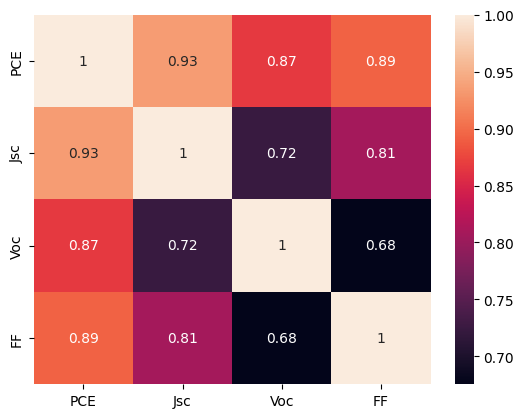

In [6]:
sns.heatmap(df_target.corr(), annot=True)

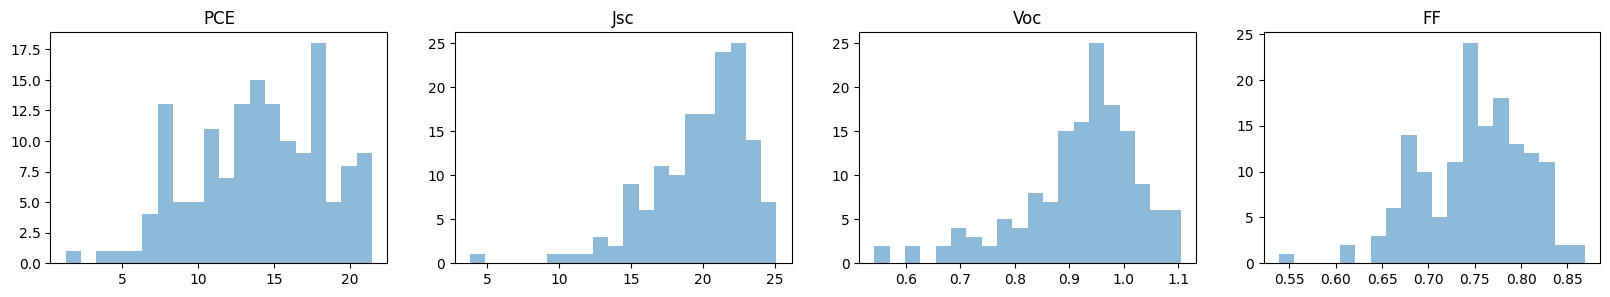

In [7]:
fig = plt.figure(figsize=(20, 3))
for i, target_label in enumerate(["PCE", "Jsc", "Voc", "FF"]):
    col = df[target_label]
    ax = fig.add_subplot(1, 4, i+1)
    ax.hist(col, bins=20, alpha=0.5)
    ax.set_title(target_label)

In [8]:
# df["SMILES"].to_csv('./data/SMILES.txt', index=False, header=False)

In [9]:
embeddings = []
with open('./data/embeddings.csv', 'r') as f:
    for line in f:
        if line == 'sequence_embeddings\n':
            continue
        embeddings.append(json.loads(line.strip('\n').strip('\"')))

In [10]:
embeddings = np.stack([np.array(embedding) for embedding in embeddings])

In [11]:
embeddings.shape

(149, 768)

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
embeddings_pca = pca.fit_transform(embeddings)
# explained variance

In [13]:
pca.explained_variance_ratio_.sum()

0.9898967546733132

In [14]:
df_feat = df.drop(columns=[
    "SMILES", "PCE", "Jsc", "Voc", "FF", "MolFormular",
    # "dipole", "homo", "lumo", "gap", "energy", "a", "b", "c"
])
target = df[["PCE"]].values

In [15]:
df_feat.columns

Index(['C', 'N', 'O', 'H', 'S', 'F', 'Cl', 'NumAtoms', 'AtomIsInRing',
       'AtomIsAromatic', 'NumBonds', 'BondIsConjugated', 'BondIsAromatic',
       'NumRotatableBonds', 'fr_C_O_noCOO', 'fr_Al_COO', 'fr_Ar_COO',
       'fr_Al_OH', 'fr_Ar_OH', 'fr_NH2', 'fr_SH', 'fr_sulfide',
       'fr_alkyl_halide', 'ExactMolWt', 'FpDensityMorgan3', 'MolLogP', 'MolMR',
       'FractionCSP3', 'has_CN(C)C', 'has_CNC', 'has_C=NC', 'has_Thiophene',
       'has_Pyrrole', 'has_Benzimidazole', 'has_Benzothiophene',
       'has_Naphthalene', 'has_Biphenyl', 'has_Triphenylamine', 'dipole',
       'homo', 'lumo', 'gap', 'energy', 'a', 'b', 'c'],
      dtype='object')

In [16]:
features_manual = df_feat.values
features = np.concatenate([df_feat.values, embeddings_pca], axis=1)

In [17]:
features.shape

(149, 76)

In [42]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from utils import leave_one_out_crossval, standardize_data, generate_trainset


def test_model(_model_cls, _features, _target):
    # kf = KFold(n_splits=10, random_state=0, shuffle=True)
    # split_indices = kf.split(X=_features)
    # r2_scores = []
    # for train_index, test_index in split_indices:
    #     _X_train, _X_test = _features[train_index], _features[test_index]
    #     _y_train, _y_test = _target[train_index], _target[test_index]
    #     _model = _model_cls(random_state=0)
    #     _model.fit(_X_train, _y_train)
    #     _y_pred = _model.predict(_X_test)
    #     r2_scores.append(r2_score(_y_test, _y_pred))
    preds = []
    ground = []
    for xtrain, xtest, ytrain, ytest in leave_one_out_crossval(_features, _target, samples, reject='both'):
        xtrain, ytrain, x_scaler, y_scaler = standardize_data(xtrain, ytrain)
        xtest = x_scaler.transform(xtest)
        # print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)
        reg = _model_cls().fit(xtrain, ytrain.squeeze())
        # for f, c in zip(feat_order, reg.coef_[0]):
        #     coefficients[f].append(c)
        # coefficients['intercept'].append(reg.intercept_)
        preds.append(y_scaler.inverse_transform(reg.predict(xtest).reshape(1,-1)).item())
        ground.append(ytest.item())
    # return np.mean(r2_scores)
    return r2_score(ground, preds), ground, preds

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor

In [84]:
DATA_PATH = './data/dataset.csv'
X, y, samples_composition = generate_trainset(path=DATA_PATH, use_simulation=True, objective='PCE')

features_labels = ["C count", "N count", "O count", "H count", "S count",
            "F count", "Cl count", "atoms count", "atoms in ring",
            "aromatic atoms count", "bonds count", "conjugated bonds count",
            "aromatic bonds count", "rotatable bonds count", "carbonyl O (excl. COOH) count",
            "exact molecular weight", "Morgan FP density", "fraction of SP3 C", "log P",
            "molar refractivity", "has tertiary amine", "has secondary amine", "has imine",
            "has thiophene", "has pyrrole", "has benzimidazole", "has benzothiophene",
            "has naphthalene", "has biphenyl", "TPSA", "HBA", "HBD",
            "dipole", "homo level", "lumo level",
            "homo/lumo gap", "total energy", "rotation constant a", "rotation constant b",
            "rotation constant c", 'purity']
single_task_best_features = [
    'has tertiary amine',
    'rotation constant c',
    'dipole',
    'purity',
    'aromatic bonds count',
    'N count',
    'log P',
    'aromatic atoms count',
    # "HBA"
    ]
MASK = [(f in single_task_best_features) for f in features_labels]
feat_order = [f for f in features_labels if f in single_task_best_features]
X = X[..., MASK]

INFO: Reading excel files.
INFO: Reading structures.


100%|██████████| 149/149 [00:00<00:00, 1054.38it/s]


INFO: Making features:


100%|██████████| 149/149 [00:00<00:00, 458.89it/s]


In [70]:
r2, ground, pred = test_model(LinearRegression, X, y)

0.37390973914201886


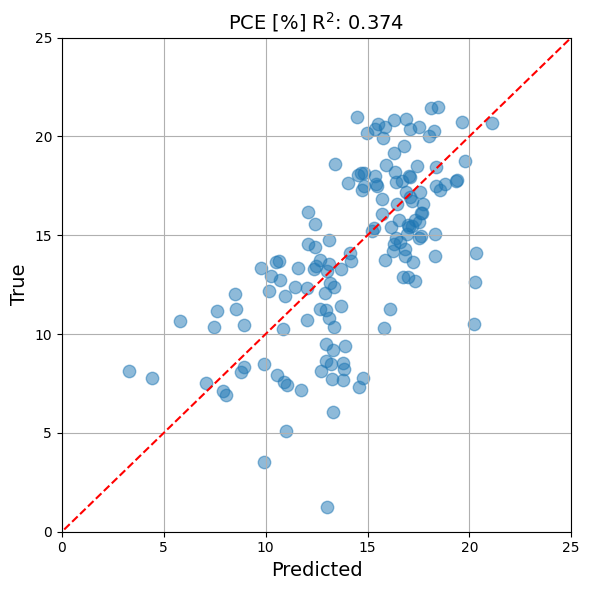

In [72]:
plot_scatter(pred, ground)

0.47548493673558967


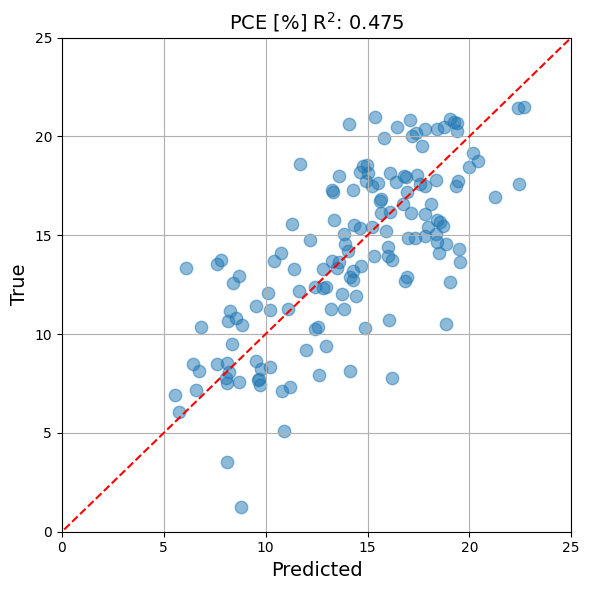

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
embeddings_pca = pca.fit_transform(embeddings)
# explained variance
r2, ground, pred = test_model(LinearRegression, np.concatenate([embeddings_pca, X], axis=1), target)
plot_scatter(pred, ground)

In [41]:
test_model(RandomForestRegressor, X, y)

0.36509731437796655

In [25]:
test_model(LinearRegression, features, target)

-2723.7035132285473

In [47]:
test_model(RandomForestRegressor, features, target)

0.34636420660443956

In [59]:
test_model(RandomForestRegressor, features_manual, df["PCE"])

0.5455346192968017

In [60]:
test_model(XGBRegressor, features, df["PCE"])

0.458259278273054

In [61]:
test_model(RandomForestRegressor, embeddings_pca, df["homo"])

0.2758333716876463